**Имя проекта: Исследование объявлений о продаже квартир**

**Постановка задачи:** 

По данным сервиса Яндекс.Недвижимость — архиву объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет - нужно научиться определять рыночную стоимость объектов недвижимости. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Содержание**

1. Загрузка и изучение данных

# Загрузка и изучение данных

In [1]:
# Первым делом - самолеты, ну, то есть - подключение необходимых библиотек

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Загружаем исходный массив данных и выводим его для предварительной оценки
data = pd.read_csv('real_estate_data.csv', sep = '\t')

#data = pd.read_csv('real_estate_data.csv', sep = '\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
# Посмотрим общие данные обо всем датасете

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# По каждому столбцу для пущей наглядности выведем подробные данные

for col in data:
    
    if data[col].dtype != object:
        print('Статистика данных в столбце', col)
        print(data[col].describe())
        print()
    
        print('Количество уникальных значений в столбце', col)
        print(len(data[col].value_counts()))
        
        print('Количество пропусков в столбце', col)
        print(data[col].isna().sum())
        
    if data[col].dtype == object:
        
        print('Количество уникальных значений в столбце', col)
        print(data[col].value_counts())
        print() 
        
        print('Количество пропусков в столбце', col)
        print(data[col].isna().sum())
        
    print('_____________________________________________________')

Статистика данных в столбце total_images
count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

Количество уникальных значений в столбце total_images
38
Количество пропусков в столбце total_images
0
_____________________________________________________
Статистика данных в столбце last_price
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Количество уникальных значений в столбце last_price
2978
Количество пропусков в столбце last_price
0
_____________________________________________________
Статистика данных в столбце total_area
count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Описание содержимого датасета</b>
    

    
    Всего в датасете содержится 23699 строк, 22 столбца:

 1. total_images — число фотографий квартиры в объявлении:
    - пропусков нет;
    - формат данных (Int64) не требует корректировки.
 2. last_price — цена на момент снятия с публикации:
    - пропусков нет; 
    - формат данных (float64) не требует корректировки.
 3. total_area — площадь квартиры в квадратных метрах:
    - пропусков нет; 
    - формат данных (float64) не требует корректировки.
 4. first_day_exposition — дата публикации объявления:
    - пропусков нет; 
    - формат данных (object) требует форматирования и перевода в datetime.
 5. rooms — число комнат в квартире:
    - пропусков нет;
    - формат данных (int64) не требует корректировки.
 6. ceiling_height — высота потолков (м):
    - 9195 пропусков (39%). Они могли появиться по той причине, что данная информация не является ключевой и может выдаваться продавцом по желанию, а многие просто не берут ее в расчет при написании объявления. Заполнять отсутствующие значения смысла нет - пропусков в этих данных почти половина, заполнение статданными может привести к искажению реальной картины;
    - формат данных (float64) не требует какой-либо корректировки.
 7. floors_total — всего этажей в доме:
    - 86 пропусков (0.3%). Причиной таких пропусков может является ошибка при заполнении данных объявления. Такое количество пропущенных значений не является критическим, что позволяет оставить их как есть, так как рассчитать даже примерное число этажей мы не можем без дополнительных данных;
    - формат данных (float64) имеет смысл перевести в int, но в данном случае оставим его как есть, потому что в наличии пропуски, которые имеют тип float64.
 8. living_area — жилая площадь в квадратных метрах:
    - 1903 незаполненных строк (8%). Так как данный параметр является одним из ключевых при формировании объявления о продаже жилья, то наличие пропусков, скорее всего, это результат допущения ошибки при заполнении, либо потерей данных при сохранении. Заполнить данные пропуски можно, высчитав среднее значение по отношению "жилая площадь/общая площадь", а затем рассчитать "полученное значение*общая площадь квартиры" для каждой строки;
    - формат данных (float64) не требует корректировки. 
 9. floor — этаж, на котором находится квартира:
    - пропусков нет;
    - формат данных (int64) не требует корректировки. 
 10. is_apartment — является ли продаваемая недвижимость апартаментами:
     - 20924 пропуска (88%). Их наличие может быть объяснено тем, что хозяин объявления не считает важным указывать дополнительно, что квартира не является апартаментами (например, в заголовке объявления уже указано, что это квартира в жилом доме). Тогда можно сделать предположение, что все пропущенные значения соответствуют значению False и заполнить их именно в таком формате;
     - формат данных (bool) не требует корректировки, достаточно удобно воспринимать True за "да" и False за "нет".
 11. studio — является ли продаваемая квартира студией:
     - пропусков нет;
     - формат данных (bool) не требует корректировки.
 12. open_plan — свободная планировка:
     - пропусков нет;
     - формат данных (bool) не требует корректировки.
 13. kitchen_area — площадь кухни в квадратных метрах:
     - 2278 пропусков (9,6%). Их наличие может быть объяснено тем, что кухня может быть объединена с гостиной, а потому отдельно не указыватеся. Или же она слишком маленькая, а хозяин не указывает площадь, чтобы сразу не отбить потенциального покупателя. Либо данный параметр кем-то не рассматривается в качестве важного. Количество пропусков достаточно большое, заполнять их опасно, так как это сильно исказит реальную картину. Думаю, что при необходимости лучше работать с имеющимися данными.
     - формат данных (float64) не требует корректировки.
 14. balcony — число балконов:
     - 11519 пропусков (48,6%). Пропуски в данном столбце могут быть объяснены тем, что при отсутствии балкона в квартире хозяин просто оставлял данный параметр незаполненным. Можно заменить нулями.
     - формат данных (float64) есть смысл заменить на int
 15. locality_name — название населённого пункта:
     - 49 пропусков (0,2%). Наличие пропусков может объясняться ошибкой при формировании объявления. Количество пустых строк не является критичным для анализа, а, значит, можно их не заполнять (тем более, что точно определить район по имеющимся данным достаточно сложно.
     - формат данных (object) корректировки не требует
 16. airports_nearest — расстояние до ближайшего аэропорта в метрах (м):
     - 5542 пропуска (23,4%). Данные параметры, очевидно, заполняются в автоматическом режиме программой. Наличие пропусков можно оправдать тем, что хозяин объявления не укаызывает точного адреса жилого дома, либо опечаткой в адресе, либо ошибкой в программе (маловероятно). Заполнять такие пропуски можно, сравнивая с имеющимся данным по названиям поселка. Но точность такого метода оставляет желать лучшего, а смысла в заполнении толком нет, так как этот параметр в нашем случае не является ключевым;
     - формат данных (float64) не требует корректировки.
 17. cityCenters_nearest — расстояние до центра города (м):
     - 5519 пропусков (23,3%). Ситуация аналогична столбцу airports_nearest. Даже количество пропусков приблизительно равно, что может косвенно подтвердить сделанный вывод о неточности или отсутствии указания адреса жилья. Заменять пропуски смысла нет;
     - формат данных (float64) не требует корректировки.
 18. parks_around3000 — число парков в радиусе 3 км:
     - 5518 пропусков (23,3%). И снова повторение ситуации, которая была в двух предыдущих столбцах. Выводы те же;
     - формат данных (float64) есть смысл заменить на int, но ввиду наличия здесь значений NaN, оставляем как есть.
 19. parks_nearest — расстояние до ближайшего парка в метрах:
     - 15620 пропусков. Такое количество пропусков коррелируется с тем, что в столбце parks_around имеется 5518 пропусков как таковых (т.е. вообще нет информации о парках), а также 10106 нулевых значения (т.е., поблизости парков нет), что в сумме дает 15624 пустых значения здесь (4 значения, видимо, записаны ошибочно). Заполнения данный столбец не требует, лучше оставить как есть.
     - формат данных (float64) не требует корректировки.
 20. ponds_around3000 — число водоёмов в радиусе 3 км:
     - 5518 пропусков (23,3%). И снова повторение ситуации, которая была в столбцах airports_nearest, cityCenters_nearest, вызванной отсутствием указания точного адреса, parks_around3000. Выводы те же;
     - формат данных (float64) есть смысл заменить на int, но ввиду наличия здесь значений NaN, оставляем как есть.
 21. ponds_nearest — расстояние до ближайшего водоёма (м). 1096 непустых строк:
     - 14589 пропусков. Ситуация аналогична столбцу parks_nearest: в столбце ponds_around имеется 5518 пропусков как таковых (т.е. нет информации о водоемах поблизости), а также 9071 нулевых значения (т.е., поблизости водоемов нет), что в сумме дает 14589 пропусков здесь. Заполнения данный столбец не требует.
 22. days_exposition — сколько дней было размещено объявление (от публикации до снятия):
     - 3181 пропусков (95%). По всей видимости, если объявление не снято с публикации, то и квартира еще не продана, а, значит, и значение данного столбца не заполняется. Отсюда и пропуски;
     - формат данных (float64) есть смысл заменить на int, но ввиду наличия здесь значений NaN, оставляем как есть.
</div>


                                                                                   
                                                                                   "И глянул он в священный датасет, и воскликнул:
                                                                                   'Ё-моё! Будем разбираться!'"
                                                                                                                Писание Вечного Гуру DS,
                                                                                                                стр. 15, стих 6, строки 3-4


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Вывод по 1 разделу</b>
    
 - На данном этапе получена информация обо всем датасете в целом, а также о каждом столбце по-отдельности. Описаны имеющиеся пропуски в значениях, высказаны предположения о причинах их появления, способы и целесообразность их заполнения. Рассмотрена необходимость изменения типов данных столбцов.
</div>

# Предобработка данных

## Работа со столбцом first_day_exposition

In [5]:
# Сменим тип данных столбца на временной формат datetime

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

In [6]:
# Проверяем результаты наших трудов

print(data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


## Работа со столбцом living_area

In [7]:
# Заполним пропуски в столбце living_area. Для этого рассчитаем медианное значение отношения жилой площади к общей. 
# На основе этого посчитаем жилую площадь для строк с пропусками

data['living_area'] = data['living_area'].fillna(data['total_area'] * (data['living_area'] / data['total_area']).median())

In [8]:
# Проверяем результат

col = 'living_area'

print('Количество пропусков в столбце {} равно {}'.format(col, data[col].isna().sum()))

Количество пропусков в столбце living_area равно 0


## Работа со столбцом is_apartment

In [9]:
# заполняем пропуски в столбце is_apartment значением False

data['is_apartment'] =  data['is_apartment'].fillna(False)

In [10]:
# Проверяем результат

col = 'is_apartment'
print('Количество пропусков в столбце {} равно {}'.format(col, data[col].isna().sum()))

Количество пропусков в столбце is_apartment равно 0


## Работа со столбцом balcony

In [11]:
# Заменим пропуски столбца balcony нулями

data['balcony'] = data['balcony'].fillna(0)

In [12]:
# Заменим тип данных столбца на целочисленный

data['balcony'] = data['balcony'].astype('int')

In [13]:
# Проверяем результаты замены и форматирования

col = 'balcony'
print('Количество пропусков в столбце {} равно {}, тип данных: {}'.format(col, data[col].isna().sum(), data[col].dtype))

Количество пропусков в столбце balcony равно 0, тип данных: int32


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Вывод по 2 разделу</b>
    
 - На данном этапе была проведена предобработка данных для удобства их использования в дальнейшем. Так, тип данных столбца first_day_exposition был заменен на datetime, пропуски в living_area заменены медианным значением, в is_apartment на значение False, в balcony - на нули.
</div>

# Формирование новых признаков

## Стоимость квадратного метра жилья

In [14]:
# Посчитаем и добавим в таблицу столбец cost_meter, который будет содержать стоимость квадратного метра жилья

data['cost_meter'] = data['last_price'] / data['total_area']

In [15]:
print(data['cost_meter'].head())

0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
Name: cost_meter, dtype: float64


## День недели, месяц и год

In [16]:
# Создаем функцию для добавления в датасет столбца с днем недели появления объявления

def first_exposition_day(first_day_exposition):
    
    days = {0:'Пн', 1:'Вт', 2:'Ср', 3:'Чт', 4:'Пт', 5:'Сб', 6:'Вс'}
    
    return days[first_day_exposition.weekday()]

In [17]:
# Создаем функцию для добавления в датасет столбца с месяцем появления объявления

def first_exposition_month(first_day_exposition):
    
    months = ({1:'Январь', 2:'Февраль', 3:'Март', 4:'Апрель', 5:'Май', 6:'Июнь', 
               7:'Июль', 8:'Август', 9:'Сентябрь', 10:'Октябрь', 11:'Ноябрь', 12:'Декабрь'})

    return months[first_day_exposition.month]

In [18]:
# Создаем функцию для добавления в датасет столбца с годом появления объявления

def first_exposition_year(first_day_exposition):
    
    return first_day_exposition.year

In [19]:
# Применяем полученные функции к датасету

data['first_exposition_day'] = data['first_day_exposition'].apply(first_exposition_day)

data['first_exposition_month'] = data['first_day_exposition'].apply(first_exposition_month)

data['first_exposition_year'] = data['first_day_exposition'].apply(first_exposition_year)

## Категоризация показателей этажа

In [20]:
# создаем функцию для формирования нового столбца датафрейма, в котором будут категоризированы квартиры в зависимомти от этажа

def floor_category(row):

    floor = row['floor']
    floors_total = row['floors_total']

    if floor == 1:
        return 'Первый'
    
    if floor == floors_total:
        return 'Последний'
    
    else:
        return 'Другой'

In [21]:
# Применяем функцию flat_stage 

data['floor_category'] = data.apply(floor_category, axis=1)

In [22]:
# Проверяем результаты категоризации

data['floor_category'].value_counts()

Другой       17446
Последний     3336
Первый        2917
Name: floor_category, dtype: int64

## Соотношения площадей

In [23]:
# добавляем в таблицу строку, которая содержит соотношение жилой  площади к общей

data['living_area_share'] = data['living_area'] / data['total_area']

In [24]:
# добавляем в таблицу строку, которая содержит соотношение площади кухни к общей площади жилья

data['kitchen_area_share'] = data['kitchen_area'] / data['total_area']

## Проверка результатов

In [25]:
# Выводим всю таблицу для проверки наличия созданных столбцов

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_meter,first_exposition_day,first_exposition_month,first_exposition_year,floor_category,living_area_share,kitchen_area_share
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,2.0,755.0,NaN,120370.370370,Чт,Март,2019,Другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.600000,1,False,...,0.0,NaN,81.0,82920.792079,Вт,Декабрь,2018,Первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.300000,4,False,...,2.0,574.0,558.0,92785.714286,Чт,Август,2015,Другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,90.289724,9,False,...,3.0,234.0,424.0,408176.100629,Пт,Июль,2015,Другой,0.567860,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,1.0,48.0,121.0,100000.000000,Вт,Июнь,2018,Другой,0.320000,0.410000


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Вывод по 3 разделу</b>
    
На текущем этапе в датасет были добавлены новые признаки, ответственные за следующие параметры: 
    

- стоимость квадратного метра жилья;
- день недели, месяц, год появления объявления; 
- категоризированные данные об этажах ("первый", "последний" и "другое"); 
- соотношение жилой площади к общей и площади кухни к общей. 
    
В дальнейшем эти данные будут полезны для анализа.
</div>

# Исследовательский анализ данных

## Исследование набора данных о площади жилья

In [26]:
# Для удобства работы в дальнейшем создаем новый датасет-копию исходного, в котором можно будет работать, не изменяя значений в оригинальном файле

data_cleaned = data.copy()

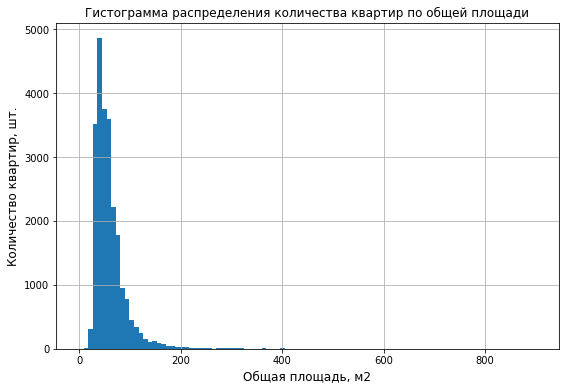

In [27]:
# Построим гистаграмму площади жилья с помощью метода hist()

data['total_area'].hist(bins = 100, range = (0, data['total_area'].max()), figsize = (9, 6)).set_title('Гистограмма распределения количества квартир по общей площади')
plt.xlabel('Общая площадь, м2', fontsize=12)
plt.ylabel('Количество квартир, шт.', fontsize=12)
plt.show()

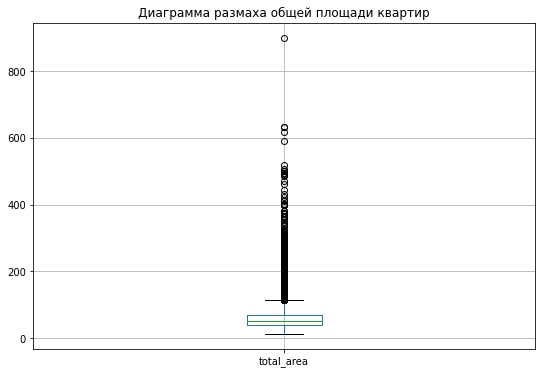

In [28]:
# Построим диаграмму размаха для оценки наличия выбросов и зачистки на этой основе столбца total_area

data.boxplot(column = 'total_area', figsize = (9, 6)).set_title('Диаграмма размаха общей площади квартир')
plt.show()

In [29]:
# Создадим функцию для точного расчета максимального и минимального значений "ящика с усами". Полученные значения записываются в строку (1-е число - минимум, 2-е - максимум)

def find_quartiles(col):
    
    res = []
    res.append(np.percentile(data[col], 25) - (1.5 * (np.percentile(data[col], 75) - np.percentile(data[col], 25)))) # расчет значения Q1 - 1.5IQR
    res.append((np.percentile(data[col], 75) - np.percentile(data[col], 25)) * 1.5 + np.percentile(data[col], 75)) # расчет значения Q2 + 1.5IQR
    return res

In [30]:
# Применяем функцию нахождения границ "ящика с усами" к столбцу total_area

quart_total_area = find_quartiles('total_area')

# Выводим полученный результат

quart_total_area

[-4.8500000000000085, 114.75000000000001]

In [31]:
# Сделаем срез площадей жилья методом query() в "промежуточном" датафрейме по рассчитанным уровням

data_cleaned_middle = data.query('total_area <= @quart_total_area[1] and total_area >= @quart_total_area[0]')

In [32]:
# Обновим показания столбца total_area в "рабочем" датасете

data_cleaned['total_area'] = data_cleaned_middle['total_area']

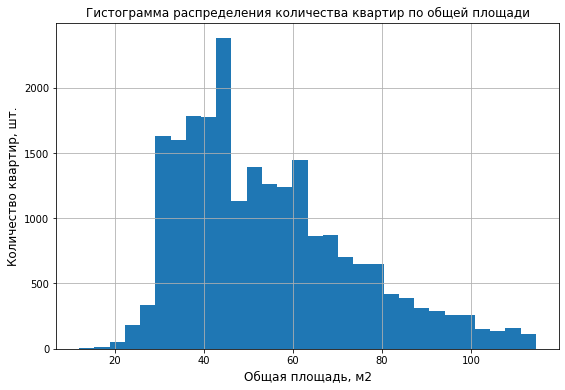

In [33]:
# Построим гистаграмму по новым данным

data_cleaned['total_area'].hist(bins = 30, figsize = (9, 6)).set_title('Гистограмма распределения количества квартир по общей площади')
plt.xlabel('Общая площадь, м2', fontsize=12)
plt.ylabel('Количество квартир, шт.', fontsize=12)
plt.show()

## Исследование набора данных о цене жилья

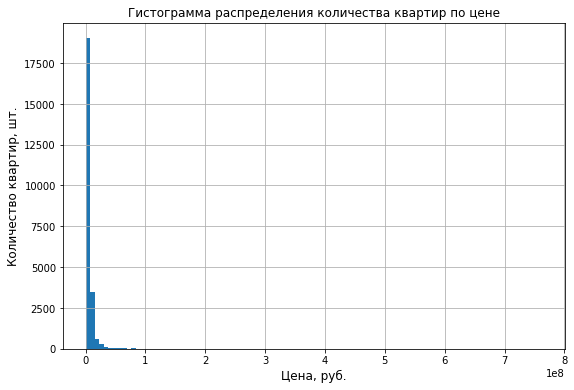

In [34]:
# Построим гистаграмму стоимости жилья - last_price

data['last_price'].hist(bins = 100, range = (0, data['last_price'].max()), figsize = (9, 6)).set_title('Гистограмма распределения количества квартир по цене')
plt.xlabel('Цена, руб.', fontsize=12)
plt.ylabel('Количество квартир, шт.', fontsize=12)
plt.show()

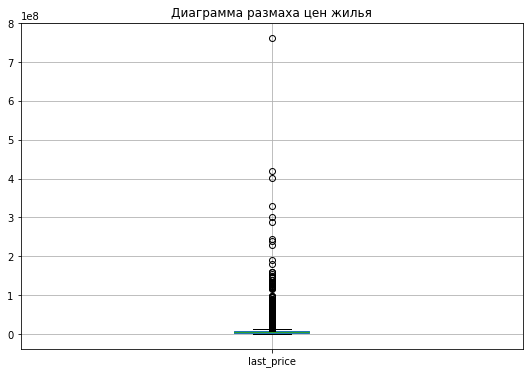

In [35]:
# Построим диаграмму размаха для оценки наличия выбросов и зачистки на этой основе столбца last_price

data.boxplot(column = 'last_price', figsize = (9, 6)).set_title('Диаграмма размаха цен жилья')
plt.show()

In [36]:
# Применяем функцию нахождения границ "ящика с усами" к столбцу last_price

quart_last_price = find_quartiles('last_price')

# Выводим полученный результат

quart_last_price

[-1700000.0, 11900000.0]

In [37]:
# Сделаем срез площадей жилья методом query() в "промежуточном" датафрейме рассчитанным уровням

data_cleaned_middle = data.query('last_price <= @quart_last_price[1] and last_price >= @quart_last_price[0]')

In [38]:
# Обновим показания столбца total_area в "рабочем" датасете

data_cleaned['last_price'] = data_cleaned_middle['last_price']

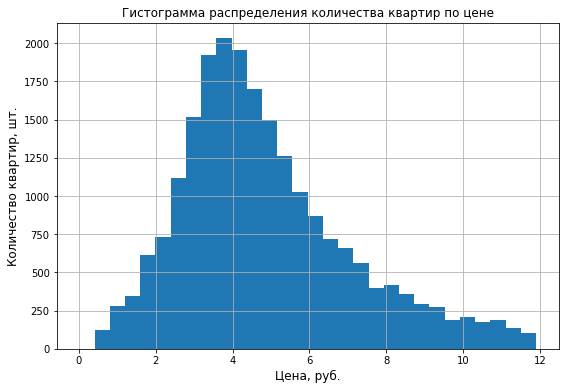

In [39]:
# Строим гистограмму цен жилья по очищенным данным. Для удобства восприятия переведем цены в млн. руб., разделив исходные на 1 000 000

(data_cleaned['last_price'] / 1000000).hist(bins = 30, figsize = (9, 6)).set_title('Гистограмма распределения количества квартир по цене')
plt.xlabel('Цена, руб.', fontsize=12)
plt.ylabel('Количество квартир, шт.', fontsize=12)
plt.show()

На полученной гистаграмме, которая близка по виду к форме нормального распределения, отчетливо видно, что самыми востребованными являются квартиры стоимостью от 3.5 до 4 млн. рублей

## Исследование данных о количестве комнат в продаваемом жилье

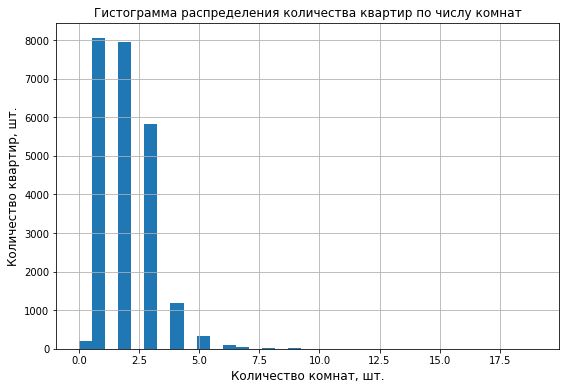

In [40]:
# Строим гистограмму по столбцу rooms

data['rooms'].hist(bins = 35, range = (0, data['rooms'].max()), figsize = (9, 6)).set_title('Гистограмма распределения количества квартир по числу комнат')
plt.xlabel('Количество комнат, шт.', fontsize=12)
plt.ylabel('Количество квартир, шт.', fontsize=12)
plt.show()

И снова отчетливо видно, что значения свышу 10 комнат являются для нашего датасета явным выбросом. Полагаю, что от них можно и нужно избавиться для анализа данного параметра. То же необходимо сделать для нулей.

Судя по полученному изображению, самым ходовым жильем является однокомнатное. За ним сразу "двушки", чуть поодаль "трешки", а потом с большим отставанием идут квартиры с 4 и более комнатами.

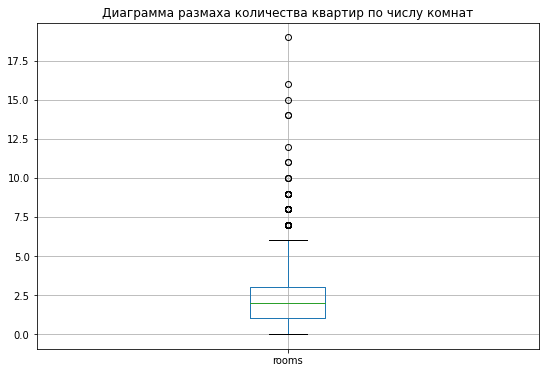

In [41]:
# Построим диаграмму размаха для оценки наличия выбросов и зачистки на этой основе столбца rooms

data.boxplot(column = 'rooms', figsize = (9, 6)).set_title('Диаграмма размаха количества квартир по числу комнат')
plt.show()

In [42]:
# Применяем функцию нахождения границ "ящика с усами" к столбцу rooms

quart_rooms = find_quartiles('rooms')

# Выводим полученный результат

quart_rooms

[-2.0, 6.0]

In [43]:
# Сделаем срез площадей жилья методом query() в "промежуточном" датафрейме по рассчитанным уровням

data_cleaned_middle = data.query('rooms <= @quart_rooms[1] and rooms >= @quart_rooms[0]')

In [44]:
# Переписываем соответствующий столбец рабочего датафрейма

data_cleaned['rooms'] = data_cleaned_middle['rooms']

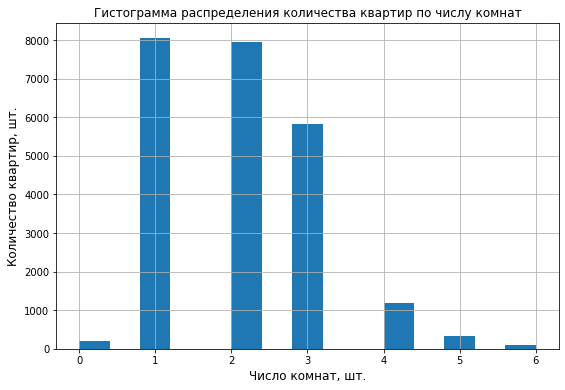

In [45]:
# Выводим обновленную гистограмму по количеству комнат
 
data_cleaned['rooms'].hist(bins = 15, range = (data_cleaned['rooms'].min(), data_cleaned['rooms'].max()), figsize = (9, 6)).set_title('Гистограмма распределения количества квартир по числу комнат')
plt.xlabel('Число комнат, шт.', fontsize=12)
plt.ylabel('Количество квартир, шт.', fontsize=12)
plt.show()

## Исследование набора данных о высоте потолков

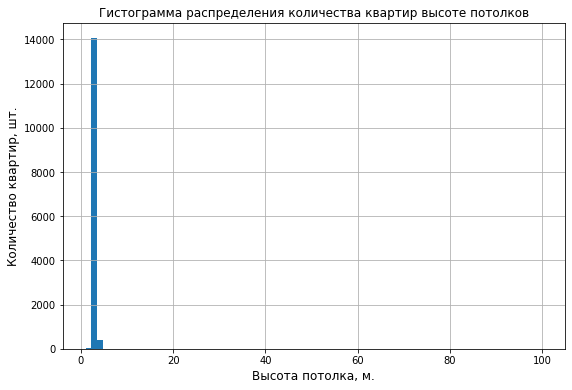

In [46]:
# Строим гистограмму по столбцу ceiling_height

data['ceiling_height'].hist(bins = 80, range = (data['ceiling_height'].min(), data['ceiling_height'].max()), figsize = (9, 6)).set_title('Гистограмма распределения количества квартир высоте потолков')
plt.xlabel('Высота потолка, м.', fontsize=12)
plt.ylabel('Количество квартир, шт.', fontsize=12)
plt.show()

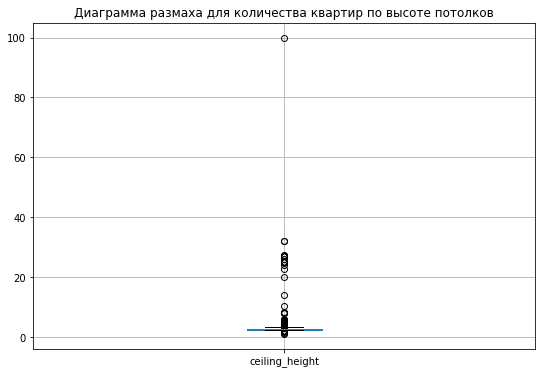

In [47]:
# Построим диаграмму размаха для оценки наличия выбросов и зачистки на этой основе столбца ceiling_height

data.boxplot(column = 'ceiling_height', figsize = (9, 6)).set_title('Диаграмма размаха для количества квартир по высоте потолков')
plt.show()

In [48]:
# Сделаем срез площадей жилья методом query() в "промежуточном" датафрейме по рассчитанным уровням

data_cleaned_middle = data.query('ceiling_height <= 3.25 and ceiling_height >= 2.25')

In [49]:
# Переписываем соответствующий столбец рабочего датафрейма

data_cleaned['ceiling_height'] = data_cleaned_middle['ceiling_height']

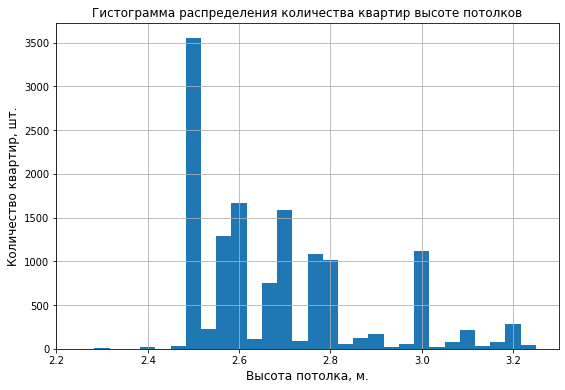

In [50]:
# Выводим обновленную гистограмму

data_cleaned['ceiling_height'].hist(bins = 30, range = (data_cleaned['ceiling_height'].min(), data_cleaned['ceiling_height'].max()), figsize = (9, 6)).set_title('Гистограмма распределения количества квартир высоте потолков')
plt.xlabel('Высота потолка, м.', fontsize=12)
plt.ylabel('Количество квартир, шт.', fontsize=12)
plt.show()

## Изучение времени продажи квартиры

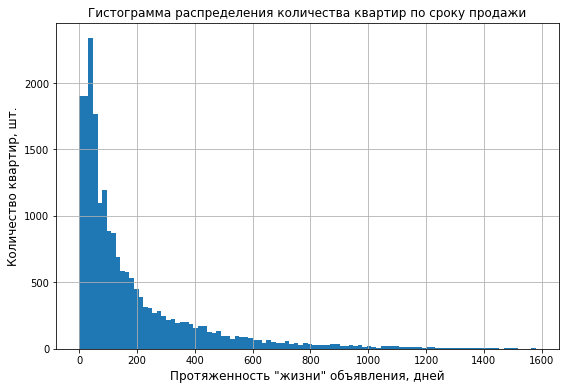

In [51]:
# Строим гистограмму по столбцу days_exposition

data['days_exposition'].hist(bins = 100, range = (0, data['days_exposition'].max()), figsize = (9,6)).set_title('Гистограмма распределения количества квартир по сроку продажи')
plt.xlabel('Протяженность "жизни" объявления, дней', fontsize=12)
plt.ylabel('Количество квартир, шт.', fontsize=12)
plt.show()

In [52]:
# Рассчитываем медианное значение столбца days_exposition

print('Медианное значение столбца days_exposition:', data['days_exposition'].median())

Медианное значение столбца days_exposition: 95.0


In [53]:
# Рассчитываем среднее значение столбца days_exposition

print('Среднее значение столбца days_exposition:', data['days_exposition'].mean())

Среднее значение столбца days_exposition: 180.88863436982163


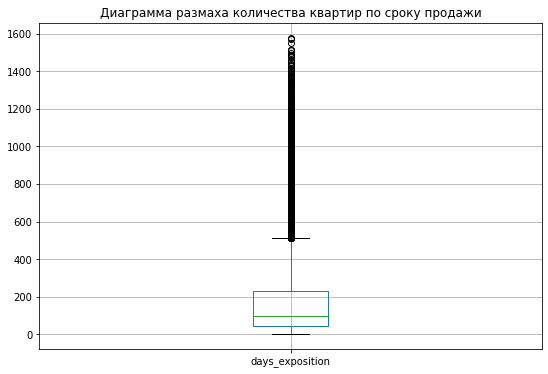

In [54]:
# Построим диаграмму размаха для оценки наличия выбросов и зачистки на этой основе столбца days_exposition

data.boxplot(column = 'days_exposition', figsize = (9, 6)).set_title('Диаграмма размаха количества квартир по сроку продажи')
plt.show()

In [55]:
# Сделаем срез площадей жилья методом query() в "промежуточном" датафрейме

data_cleaned_middle = data.query('days_exposition <= 510 and days_exposition >= 0')

In [56]:
# Переписываем соответствующий столбец рабочего датафрейма

data_cleaned['days_exposition'] = data_cleaned_middle['days_exposition'] 

Из диаграммы размаха видно, что значения свыше 520 дней продажи квартиры являются отклонением от нормы. 

То же следует из сравнения значений среднего (180 дней) и медианы (95 дней) по данному столбцу - перекос в большую сторону из-за выбросов. 

Таким образом, можно сделать вывод, что среднее время продажи квартиры находится впределах от приблизительно 50 до 250 дней (в рамках нормального распределения). Если меньше 50 дней - продажа произошла очень быстро, более 250 - необычайно долго. 

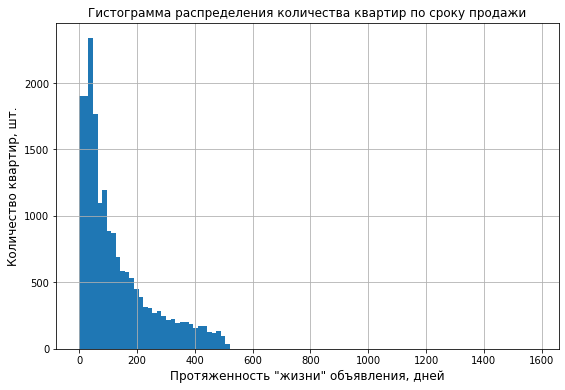

In [57]:
# Строим гистограмму по столбцу days_exposition

data_cleaned['days_exposition'].hist(bins = 100, range = (0, data['days_exposition'].max()), figsize = (9,6)).set_title('Гистограмма распределения количества квартир по сроку продажи')
plt.xlabel('Протяженность "жизни" объявления, дней', fontsize=12)
plt.ylabel('Количество квартир, шт.', fontsize=12)
plt.show()

Чаще всего квартиры продаются примерно на 50 день. Достаточно большая вероятность продажи в первые 10-15 дней. Примерно с 3-го месяца продажи количество успешных сделок неуклонно снижается.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Вывод по 4 разделу</b>
    
 - На текущем этапе была произведена очистка нескольких столбцов датасета от выбросов. Данный вопрос решался путем построения диаграммы размаха и формирования на ее основе среза для каждого из представленных столбцов. В итоге был сформирован новый датафрейм, в котором обновлялись очищенные столбцы для удобства работы в дальнейшем.
</div>

# Изучение факторов, влияющих на стоимость квартиры

## Расчет матрицы корреляции

In [58]:
# Сделаем расчет матрицы корреляции для нашего датасета

corr_table = data_cleaned.corr()

In [59]:
# Выведем полученную матрицу

corr_table.head()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_meter,first_exposition_year,living_area_share,kitchen_area_share
total_images,1.000000,0.158300,0.126016,0.104829,0.031124,0.010427,0.102125,0.031340,0.010532,-0.029303,...,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,0.017756,0.132780,0.140411,-0.000248,-0.026039
last_price,0.158300,1.000000,0.695302,0.452862,0.451553,0.184911,0.585451,0.127349,0.022223,-0.069470,...,-0.345619,0.118709,0.039126,0.145720,-0.051808,0.049323,0.608790,-0.003480,0.022248,-0.120466
total_area,0.126016,0.695302,1.000000,0.789250,0.366164,-0.022241,0.910608,-0.020112,0.019473,-0.112063,...,-0.183571,0.096656,0.025392,0.126244,-0.053277,0.109578,0.117349,-0.061731,0.205809,-0.373227
rooms,0.104829,0.452862,0.789250,1.000000,0.182366,-0.228704,0.819868,-0.154976,-0.003095,-0.156269,...,-0.173809,0.127434,-0.055893,0.089150,-0.050411,0.108265,0.036437,-0.057842,0.479241,-0.606983
ceiling_height,0.031124,0.451553,0.366164,0.182366,1.000000,0.041544,0.346230,0.036870,0.060244,0.021009,...,-0.320485,0.220706,-0.041916,0.215134,-0.131333,0.083970,0.376217,-0.094838,-0.109909,0.079862


In [60]:
# Из матрицы извлекаем столбец корреляции цены квартиры и других параметров, сортируем его по убыванию

corr_table.loc['last_price'].sort_values(ascending = False)

last_price               1.000000
total_area               0.695302
cost_meter               0.608790
living_area              0.585451
kitchen_area             0.483219
rooms                    0.452862
ceiling_height           0.451553
floors_total             0.184911
total_images             0.158300
ponds_around3000         0.145720
floor                    0.127349
parks_around3000         0.118709
balcony                  0.063303
days_exposition          0.049323
parks_nearest            0.039126
living_area_share        0.022248
is_apartment             0.022223
first_exposition_year   -0.003480
airports_nearest        -0.039790
open_plan               -0.047440
ponds_nearest           -0.051808
studio                  -0.069470
kitchen_area_share      -0.120466
cityCenters_nearest     -0.345619
Name: last_price, dtype: float64

In [61]:
# Саздадим новый столбец в рабочем датафрейму, в котором цена на квартиру будет переведена в млн. руб

data_cleaned['last_price_mlns'] = data_cleaned['last_price'] / 1000000

***Выводы по столбцу last_price в мартице корреляции***

По полученным данным можно сделать влиянии различных факторов на итоговую стоимость квартиры. Следи них выделяются следующие:
    
    - более всего стоимость квартиры зависит от общей площади жилья (коэффициент корреляции равен 0,69);    
    - стоимость жилья сильно зависит от стоимости квадратного метра (коэффициент корреляции равен 0,60);
    - число комнат играет немаловажную роль в формировании цены квартиры (коэффициент корреляции равен 0,45);
    - удаленность от центра города играет не на руку продавцам. Рост ее показателя достаточно активно уменьшает цену недвижимости (коэффициент корреляции равен -0,34)
    
Другие факторы так же имеют немаловажное влияние на стоимость жилья. Менее всего в этом плане показывает себя фактор того, является ли квартира апартаментами (коэффициент корреляции равен всего 0,02).

## Зависимость медианной цены квартир от категории этажей

In [62]:
# Изучим зависимость медианной цены квартир по категориям этажей

data_cleaned.pivot_table(index = 'floor_category', values = 'last_price_mlns', aggfunc = 'median').sort_values(by = 'last_price_mlns')

,last_price_mlns
floor_category,
Первый,3.800
Последний,4.003
Другой,4.600


Из приведенной таблицы видно, что самая маленькая медианная цена приходится на первые этажи (3,8 млн. руб.), на последнем немногим дороже (4 млн. руб.). Самая большая медианная цена оказалась у квартир, которые попадают в категорию "другой" (4,6 млн. руб.)

## Изучение зависимости цены от дня недели, месяца и года, в который было размещено объявление

In [63]:
data_cleaned.pivot_table(index = 'first_exposition_day', values = 'last_price_mlns', aggfunc = 'median').sort_values(by = 'last_price_mlns', ascending = False)

,last_price_mlns
first_exposition_day,
Вт,4.50
Ср,4.49
Пн,4.40
Сб,4.40
Чт,4.40
Вс,4.39
Пт,4.36


In [64]:
data_cleaned.pivot_table(index = 'first_exposition_month', values = 'last_price_mlns', aggfunc = 'median').sort_values(by = 'last_price_mlns', ascending = False)

,last_price_mlns
first_exposition_month,
Апрель,4.564580
Декабрь,4.490000
Ноябрь,4.450000
Март,4.433484
Сентябрь,4.401770
Октябрь,4.400000
Февраль,4.400000
Январь,4.400000
Август,4.395000


In [65]:
data_cleaned.pivot_table(index = 'first_exposition_year', values = 'last_price_mlns', aggfunc = 'median').sort_values(by = 'last_price_mlns', ascending = False)

,last_price_mlns
first_exposition_year,
2014,5.500
2015,4.900
2019,4.800
2018,4.395
2016,4.300
2017,4.300


Из полученных таблиц можно сделать следующие выводы:


    - зависимость цены квартиры от дня недели практически не просматривается. С небольшим отрывом от остальных лидируют вторники, но, как мне кажется, эта победа не говорит о наличии "вторничного обострения", когда все продавцы испытывают лютую жадность и задирают цены... хотя...;
    - по месяцам картина несколько иная. Лидирует апрель (4,46 млн. руб. медианной цены), проигрывает июнь (4,2 млн. руб.). Разрыв по уровню более заметный;
    - а вот зависимость по годам просматривается явно. Личное первенство выигрывает 2014 год с его. Дешевле всего квартиры стоили в 2016 и 2017 годах (знал бы прикуп, жил бы в Сочи).

## Анализ объявлений по местности расположения квартиры

In [66]:
## Сделаем группировку цен на жилье по месту расположения квартиры, отсортируем по убыванию и выведем первые 10 значений

data_cleaned.groupby('locality_name')['last_price_mlns'].count().sort_values(ascending = False).head(10)

locality_name
Санкт-Петербург      13763
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             397
Пушкин                 339
Колпино                336
посёлок Парголово      327
Гатчина                305
деревня Кудрово        298
Выборг                 236
Name: last_price_mlns, dtype: int64

In [67]:
# Для удобства восприятия создадим новый столбец датафрейма, в котором стоимость квадратного метра переведем в тысячи рублей

data_cleaned['cost_meter_thousands'] = data_cleaned['cost_meter'] / 1000

In [68]:
data_cleaned.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,cost_meter,first_exposition_day,first_exposition_month,first_exposition_year,floor_category,living_area_share,kitchen_area_share,last_price_mlns,cost_meter_thousands
0,20,NaN,108.0,2019-03-07,3.0,2.70,16.0,51.000000,8,False,...,NaN,120370.370370,Чт,Март,2019,Другой,0.472222,0.231481,NaN,120.370370
1,7,3350000.0,40.4,2018-12-04,1.0,NaN,11.0,18.600000,1,False,...,81.0,82920.792079,Вт,Декабрь,2018,Первый,0.460396,0.272277,3.350,82.920792
2,10,5196000.0,56.0,2015-08-20,2.0,NaN,5.0,34.300000,4,False,...,NaN,92785.714286,Чт,Август,2015,Другой,0.612500,0.148214,5.196,92.785714
3,0,NaN,NaN,2015-07-24,3.0,NaN,14.0,90.289724,9,False,...,424.0,408176.100629,Пт,Июль,2015,Другой,0.567860,NaN,NaN,408.176101
4,2,10000000.0,100.0,2018-06-19,2.0,3.03,14.0,32.000000,13,False,...,121.0,100000.000000,Вт,Июнь,2018,Другой,0.320000,0.410000,10.000,100.000000


In [69]:
## Сделаем группировку цен на жилье по месту расположения квартиры, рассчитаем среднюю стоимость квадратного метра,  отсортируем по убыванию количества объявлений и выведем первые 10 значений

local_info = data_cleaned.groupby('locality_name').agg({'last_price_mlns':['count'],'cost_meter_thousands':['median']}).sort_values(by = ('last_price_mlns', 'count'), ascending = False).head(10)

In [70]:
## Переименуем столбцы в полученной таблице для удобства восприятия

local_info.columns = ['advt_count', 'meter_cost_mean']

In [71]:
## Выведем полученныую таблицу

local_info.sort_values(by = 'meter_cost_mean')

,advt_count,meter_cost_mean
locality_name,,
Выборг,236,58.158320
Всеволожск,397,65.789474
Гатчина,305,67.796610
Колпино,336,74.723748
посёлок Шушары,440,76.876173
посёлок Мурино,522,85.878462
посёлок Парголово,327,91.642857
деревня Кудрово,298,91.860465
Пушкин,339,100.000000


In [72]:
## Сделаем запрос на значение самого дорогого жилья

local_info[local_info[('advt_count')] == local_info[('advt_count')].max()]

,advt_count,meter_cost_mean
locality_name,,
Санкт-Петербург,13763,104.761905


In [73]:
## Сделаем запрос на значение самого дешевого жилья

local_info[local_info[('advt_count')] == local_info[('advt_count')].min()]

,advt_count,meter_cost_mean
locality_name,,
Выборг,236,58.15832


В данном пункте практически все логично. Самое большое число объявлений в Санкт-Петербурге, цена максимальна там же. Дешевле всего Выборг, да и продаж там не много. Удивил г.Пушкин, в котором медианное значение цены квартиры немногим меньше питерского (104 млн. руб. в Питере против 100 млн. руб. в Пушкине)

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Вывод по 5 разделу</b>
    
 - В данном разделе проведен анализ зависимости медианной цены жилья от различных его параметров, таких как количество комнат, этаж, общая площадь, удаленность от центра и др. Осуществлен анализ стоимости жилья от его месторасположения
</div>

# Анализ стоимости жилья в центре города

## Формирования среза объявлений по Санкт-Петербургу

In [74]:
# Сформируем срез квартир по городу расположения (выбираем Санкт-Петербург), сохраняем его в новую таблицу

data_spb = data_cleaned.query('locality_name == "Санкт-Петербург"')

In [75]:
# Выводим полученный срез на экран

data_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,cost_meter,first_exposition_day,first_exposition_month,first_exposition_year,floor_category,living_area_share,kitchen_area_share,last_price_mlns,cost_meter_thousands
0,20,NaN,108.0,2019-03-07,3.0,2.70,16.0,51.000000,8,False,...,NaN,120370.370370,Чт,Март,2019,Другой,0.472222,0.231481,NaN,120.370370
2,10,5196000.0,56.0,2015-08-20,2.0,NaN,5.0,34.300000,4,False,...,NaN,92785.714286,Чт,Август,2015,Другой,0.612500,0.148214,5.196,92.785714
3,0,NaN,NaN,2015-07-24,3.0,NaN,14.0,90.289724,9,False,...,424.0,408176.100629,Пт,Июль,2015,Другой,0.567860,NaN,NaN,408.176101
4,2,10000000.0,100.0,2018-06-19,2.0,3.03,14.0,32.000000,13,False,...,121.0,100000.000000,Вт,Июнь,2018,Другой,0.320000,0.410000,10.000,100.000000
7,5,7915000.0,71.6,2019-04-18,2.0,NaN,24.0,40.658769,22,False,...,NaN,110544.692737,Чт,Апрель,2019,Другой,0.567860,0.263966,7.915,110.544693


In [76]:
# Создаем в таблице новый столбец, содержащий расстояние до центра города в километрах

data_spb['cityCenters_nearest_km'] = (data_spb['cityCenters_nearest'] // 1000)

<ipython-input-76-097ac0c1b49a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spb['cityCenters_nearest_km'] = (data_spb['cityCenters_nearest'] // 1000)


In [77]:
# Для проверки выводим полученный столбец на экран

data_spb['cityCenters_nearest_km'].head()

0    16.0
2    13.0
3     6.0
4     8.0
7    11.0
Name: cityCenters_nearest_km, dtype: float64

In [78]:
# Считаем среднюю стоимость квартиры для каждого километра в центре города

data_spb.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price_mlns', aggfunc = 'mean').sort_values(by = 'last_price_mlns', ascending = False)

,last_price_mlns
cityCenters_nearest_km,
0.0,8.346372
1.0,8.160774
4.0,7.754978
2.0,7.654493
3.0,7.443970
5.0,7.383655
6.0,6.840485
7.0,6.714581
20.0,6.365864


<AxesSubplot:title={'center':'Зависимость средней цены от удаленности от центра'}, xlabel='cityCenters_nearest_km'>

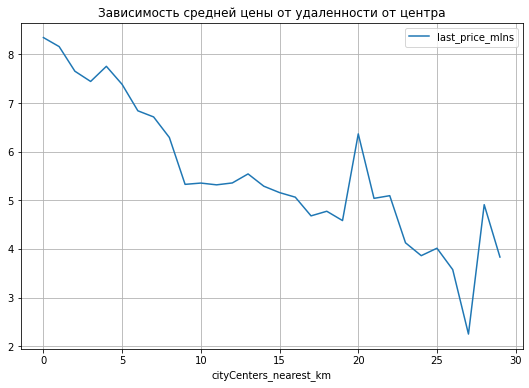

In [79]:
# Строим график зависимости средней цены на квартиру от удаленности от центра

data_spb.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price_mlns', aggfunc = 'mean').plot(figsize = (9,6), grid=True, title = 'Зависимость средней цены от удаленности от центра')

График резко меняет свой вид на примерно 8 километрах. Из этого делаем вывод, что центральной областью можно считать зону именно с этим радиусом.

## Изучение центрального района города (8-километровой зоны)

In [80]:
# Делаем срез квартир, входящих в восьмикилометровый радиус, сохраняем в отдельный датафрейм

data_center = data_spb.query('cityCenters_nearest_km <= 8')

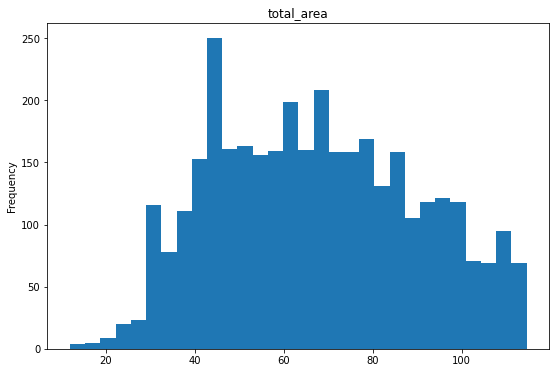

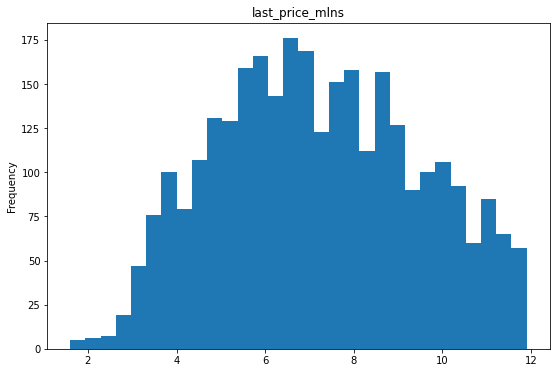

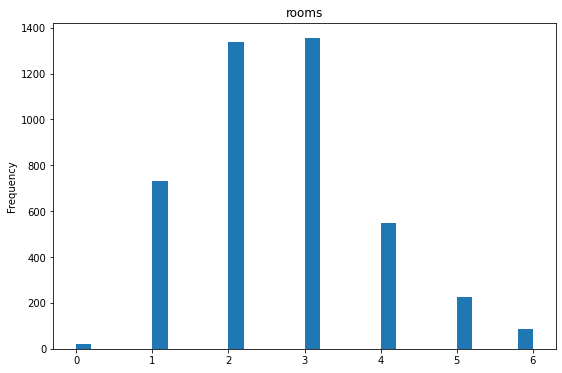

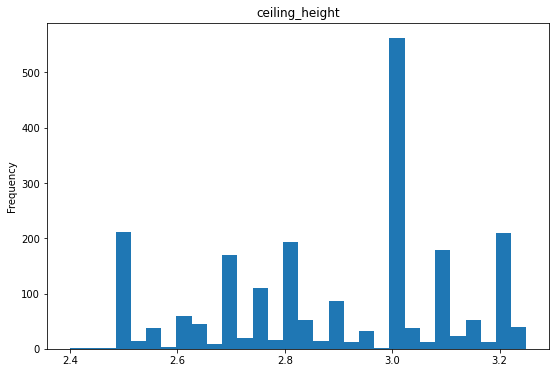

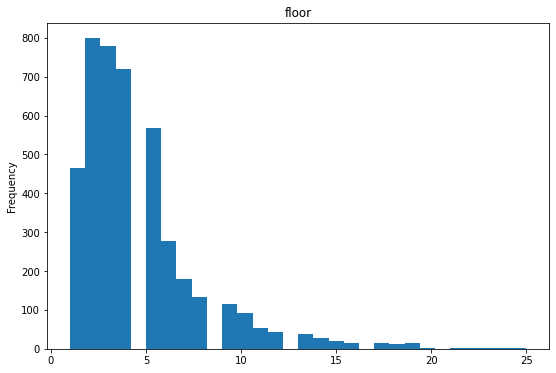

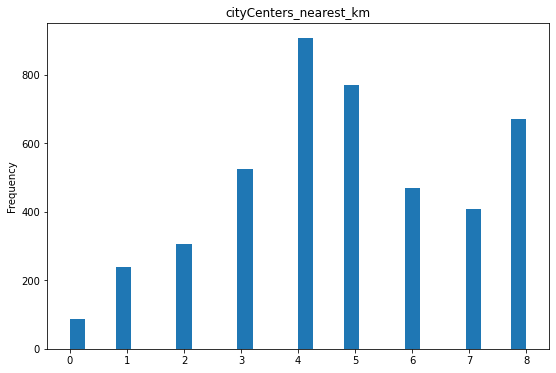

In [81]:
# Для анализа различных параметров квартир в центре построим гистограммы

for i in ['total_area', 'last_price_mlns', 'rooms', 'ceiling_height','floor','cityCenters_nearest_km']:
    data_center[i].plot(kind = 'hist', bins = 30, figsize = (9, 6)).set_title(i)
    
    plt.show()


Полученные гистограммы позволяют сделать следующие выводы:

1. В центре города преобладают квартиры с общей площадью чуть более 40 квадратных метров. Далеее по значению 62 метра квадратных, на третьем месте - прибл. 65
2. По количеству комнат самыми многочисленными оказались "двушки" и "трешки"
3. По высоте потолка самыми частыми являются трехметровые.
4. Самыми частыми по номеру этажа являются квартиры на 2 и к этажах.
5. Более всего квартир в продаже приходится на 4 километр от центра. Затем 5 км., а 3-е место занимают самые дальние восьмикилометровые (практически за пределами города! Ужас!)

In [82]:
# Для анализа влияния некоторых параметров квартир в центре на их стоимость сформируем матрицу корреляции

corr_center = data_center[['rooms', 'last_price_mlns', 'floor', 'first_day_exposition','cityCenters_nearest_km']].corr()

In [83]:
# Выведем столбец матрицы корреляции last_price для анализа влияния различных факторов на стоимость жилья в центре Питера

data_center.corr().head().loc['last_price'].sort_values(ascending = False)

last_price_mlns           1.000000
last_price                1.000000
total_area                0.726191
living_area               0.602800
rooms                     0.498153
kitchen_area              0.445994
ceiling_height            0.348331
cost_meter_thousands      0.231000
cost_meter                0.231000
days_exposition           0.127983
ponds_around3000          0.109554
total_images              0.098093
floor                     0.094302
parks_nearest             0.085008
parks_around3000          0.064188
floors_total              0.062141
balcony                   0.058045
living_area_share         0.033117
ponds_nearest            -0.003747
is_apartment             -0.025863
first_exposition_year    -0.032861
open_plan                -0.068441
airports_nearest         -0.081352
studio                   -0.086776
kitchen_area_share       -0.129340
cityCenters_nearest_km   -0.238470
cityCenters_nearest      -0.243912
Name: last_price, dtype: float64

In [84]:
# Выведем столбец матрицы корреляции last_price для анализа влияния различных факторов на стоимость жилья в общем случае

corr_table.loc['last_price'].sort_values(ascending = False)

last_price               1.000000
total_area               0.695302
cost_meter               0.608790
living_area              0.585451
kitchen_area             0.483219
rooms                    0.452862
ceiling_height           0.451553
floors_total             0.184911
total_images             0.158300
ponds_around3000         0.145720
floor                    0.127349
parks_around3000         0.118709
balcony                  0.063303
days_exposition          0.049323
parks_nearest            0.039126
living_area_share        0.022248
is_apartment             0.022223
first_exposition_year   -0.003480
airports_nearest        -0.039790
open_plan               -0.047440
ponds_nearest           -0.051808
studio                  -0.069470
kitchen_area_share      -0.120466
cityCenters_nearest     -0.345619
Name: last_price, dtype: float64

Анализ некоторых параметров матрицы корреляции позволяет сделать следующие выводы:
1. И в случае с центром города, и в общем случае самым важным фактором для формирования цены является общая площадь квартиры (в центре - 0.72, в общем - 0.7)
2. В общем случае вторым по важности фактором, влияющам на цену, является стоимость квадратного метра жилья (0.6 в общем, 0.23 в центре), а в случае с центром города его место занимает жилая площадь квартиры (в общем - 0.58, в центре - 0.6)
3. Влияние числа комнат немного растет в центре, но не критично (0.49 в центре против 0.45 в общем случае)
4. Удаленность от центра в общем случае больше влияет на уменьшение цены, чем в случае восьмикилометровой зоны (-0.34 в общем против -0.24 в центре). Значит, люди меньше парятся, что им долго будет добираться от дома на работу.

# Общий вывод

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
  
В ходе данной работы были проработаны следующие вопросы:

    Раздел 1:
- проанализирован исходный набор данных;
- проверено содержание каждого из столбцов с прицелом на поиск пропусков, неподходящих форматов данных;
- предложены способы заполнения пропущенных значений, аргументированы оставления некотороых столбцов в изначальном виде.

    Раздел 2:
- формат данных столбца first_day_exposition заменен на временной для удобства работы в дальнейшем:
- пропуски столбцы living_area заменены на медианное значение отношения жилой площади к общей по всему датафрейму;
- пропуски столбца is_apartment заменены на False, чтобы продемонстрировать, что квартиры с пропущенными значениями не являются апартаментами;
- пропуски столбца balcony заменены нулями в соответствии с предположением, что если хозяин объявления не дал информации о балконе, значит его нет.

    Раздел 3:
- в датасет добавлен столбец с рассчитанным уровнем цены квадратного метра жилья построчно;
- добавлены столбцы, которые содержат день недели, месяц и год подачи объявления;
- произведена категоризация столбца, содержащего номер этажа, на котором располагается квартира;
- сформированы столбцы с рассчитанными параметрами отношения жилой площади к общей и площади кухни к общей площади.

    Раздел 4:
- произведена очистка столбцов total_area, last_price, rooms, ceiling_height, days_exposition от выбросов с помощью использования диаграмм размаха этих параметров. Сформирован новый датафрейм, содержащий очищенные данные.

    Раздел 5:
- рассчитана матрица корреляции для изучения влияния различных параметров квартиры на ее стоимость, на ее основании сделаны выводы о зависимости цены от этих параметров; 
- выяснено, что наибольшее влияние на цену квартиры оказывает ее общая площадь (коэф. коррел. - 0,69);
- проведен анализ зависимости медианного значения цены квартир от расположения на этаже (самый низкий показатель для первого этажа - 3.8 млн. руб., далее - последний - 4.0 млн. руб., самый высокий ценник для промежуточных этажей - 4,6 млн. руб.);
- осуществлено изучение зависимости медианного значения ценника квартиры от дня недели, когда было подано объявление (дороже всего оказались вторники - 4.5 млн. руб. медианной цены), месяца (впереди всех апрель - 4.56 млн. руб.), года (2014 в лидерах с показателем в 5,5 млн. руб)
- проведено изучение зависимости стоимости квартиры от ее расположения в различных населенных пунктах. Дороже всего покупать квартиру в Санкт-Петербурге (104.8 тыс. руб. за квадратный метр медианной цены), а дешевле всех в Выборге (58.2 тыс. руб. за м.кв.)

    Раздел 6:
- рассчитана стоимость жилья в зависимости от удаленности от центра Санкт-Петербурга;
- определена область в городе, которую можно условно считать центральной;
- изучены некоторые параметры квартир, расположенных в центральном районе;
- проведено сравнение факторов, влияющих на уровень цен в центральном районе города, по-сравнению с общим случаем.
        
В заключение следует отметить, что количество факторов, влияющих на цену квартиры, достаточно велико и не всегда предсказуемо. На основании проведенного исследования можно проводить мониторинг ситуации на рынке недвижимости, отслеживать общие тенденции и отмечать какие-либо аномалии.
</div>